# TODO: Title
**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of the TODO's and/or use more than one cell to complete all the tasks.

In [ ]:
# TODO: Install any packages that you might need


In [9]:
# TODO: Import any packages that you might need
import json
import matplotlib.pyplot as plt

In [ ]:
%%capture
!aws s3 sync s3://aft-vbi-pds/ s3://capstone-tannp3/ 

In [21]:
import os
import json
import boto3
from tqdm import tqdm

def download_and_arrange_data():
    s3_client = boto3.client('s3')

    with open('file_list.json', 'r') as f:
        d=json.load(f)

    for k, v in d.items():
        print(f"Downloading Images with {k} objects")
        directory=os.path.join('train_data', k)
        if not os.path.exists(directory):
            os.makedirs(directory)
        for file_path in tqdm(v):
            file_name=os.path.basename(file_path).split('.')[0]+'.jpg'
            s3_client.download_file('aft-vbi-pds', os.path.join('bin-images', file_name),
                             os.path.join(directory, file_name))

download_and_arrange_data()

100%|██████████| 1228/1228 [01:46<00:00, 11.56it/s]


100%|██████████| 2299/2299 [03:18<00:00, 11.58it/s]


100%|██████████| 2666/2666 [03:58<00:00, 11.17it/s]


100%|██████████| 2373/2373 [03:24<00:00, 11.61it/s]


100%|██████████| 1875/1875 [02:36<00:00, 12.00it/s]


## Metadata

In [1]:
!aws s3 cp --no-sign-request s3://aft-vbi-pds/metadata/500.json -

{
    "BIN_FCSKU_DATA": {
        "B00PLKV5H6": {
            "asin": "B00PLKV5H6",
            "height": {
                "unit": "IN",
                "value": 6.799999999999999
            },
            "length": {
                "unit": "IN",
                "value": 7.0
            },
            "name": "HBD Thermoid NBR/PVC SAE30R6 Fuel Line Hose, 5/16\" x 25' Length, 0.3125\" ID, Black",
            "quantity": 1,
            "weight": {
                "unit": "pounds",
                "value": 3.0
            },
            "width": {
                "unit": "IN",
                "value": 7.0
            }
        },
        "B00WTI3SGO": {
            "asin": "B00WTI3SGO",
            "height": {
                "unit": "IN",
                "value": 1.2
            },
            "length": {
                "unit": "IN",
                "value": 7.6
            },
            "name": "The Witcher 3: Wild Hunt - PC",
            "quantity": 1,
            "weight": {
    

In [2]:
!aws s3 ls --no-sign-request s3://aft-vbi-pds/metadata/ --summarize > metadatalist

In [5]:
!tail metadatalist

2017-01-14 01:59:16       4529 99993.json
2017-01-14 01:59:16       4529 99994.json
2017-01-14 01:59:16       3740 99995.json
2017-01-14 01:59:16        864 99996.json
2017-01-14 01:59:16       2132 99997.json
2017-01-14 01:59:16       2770 99998.json
2017-01-14 01:59:16       1658 99999.json

Total Objects: 536435
   Total Size: 1098414519


## Dataset
**TODO:** Explain what dataset you are using for this project. Give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understanding of it. You can find more information about the data [here](https://registry.opendata.aws/amazon-bin-imagery/).

The dataset has 536,435 JPEG files in total in alignment with metadata files. Due to file naming rules, they can be divided into three categories:

- 1~4 digit: ```1.jpg``` ~ ```1200.jpg```: 1200
- 5-digit: ```00001.jpg``` ~ ```99999.jpg```: 99,999
- 6-digit: ```100000.jpg``` ~ ```535234.jpg```: 435,235

Furthermore, the capstone repository provides us with a chosen subset of the dataset, ```file_list.json```. We'll investigate that later.

In [10]:
#TODO: Perform any data cleaning or data preprocessing
with open("file_list.json", "r") as f:
    file_list = json.load(f)

In [13]:
len_classes = [len(i) for i in file_list.values()]

In [14]:
len_classes

[1228, 2299, 2666, 2373, 1875]

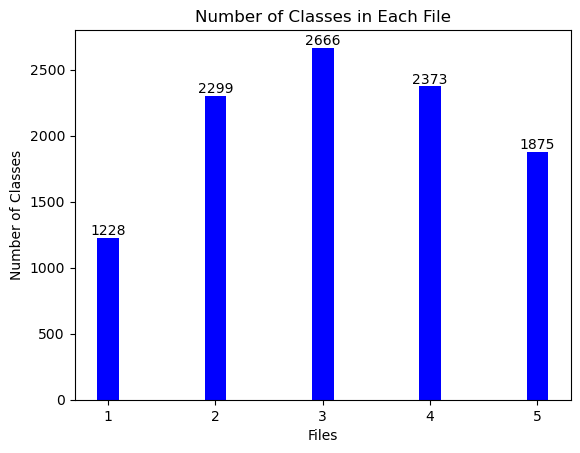

In [19]:
plt.bar(file_list.keys(), len_classes, 0.2, color='b')

plt.xlabel('Files')
plt.ylabel('Number of Classes')
plt.title('Number of Classes in Each File')

# Add text annotations above each bar
for i, len_class in enumerate(len_classes):
    plt.text(i, len_class + 0.2, str(len_class), ha='center', va='bottom', fontsize=10)

In [ ]:
#TODO: Upload the data to AWS S3

## Model Training
**TODO:** This is the part where you can train a model. The type or architecture of the model you use is not important. 

**Note:** You will need to use the `train.py` script to train your model.

In [ ]:
#TODO: Declare your model training hyperparameter.
#NOTE: You do not need to do hyperparameter tuning. You can use fixed hyperparameter values

In [ ]:
#TODO: Create your training estimator

In [ ]:
# TODO: Fit your estimator

## Standout Suggestions
You do not need to perform the tasks below to finish your project. However, you can attempt these tasks to turn your project into a more advanced portfolio piece.

### Hyperparameter Tuning
**TODO:** Here you can perform hyperparameter tuning to increase the performance of your model. You are encouraged to 
- tune as many hyperparameters as you can to get the best performance from your model
- explain why you chose to tune those particular hyperparameters and the ranges.


In [ ]:
#TODO: Create your hyperparameter search space

In [ ]:
#TODO: Create your training estimator

In [ ]:
# TODO: Fit your estimator

In [ ]:
# TODO: Find the best hyperparameters

### Model Profiling and Debugging
**TODO:** Use model debugging and profiling to better monitor and debug your model training job.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks

In [ ]:
# TODO: Create and fit an estimator

In [ ]:
# TODO: Plot a debugging output.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output

### Model Deploying and Querying
**TODO:** Can you deploy your model to an endpoint and then query that endpoint to get a result?

In [ ]:
# TODO: Deploy your model to an endpoint

In [ ]:
# TODO: Run an prediction on the endpoint

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done

### Cheaper Training and Cost Analysis
**TODO:** Can you perform a cost analysis of your system and then use spot instances to lessen your model training cost?

In [ ]:
# TODO: Cost Analysis

In [ ]:
# TODO: Train your model using a spot instance

### Multi-Instance Training
**TODO:** Can you train your model on multiple instances?

In [ ]:
# TODO: Train your model on Multiple Instances